In [1]:
import os
import math
import operator
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from textblob import TextBlob
from gsdmm import MovieGroupProcess

## pre-processed text

In [2]:
# data = pd.read_pickle("../../../sampled_processed_extant_posts.pkl")
data = pd.read_pickle("../../../sampled_processed_extant_posts.pkl")

In [3]:
print(f"rows in data: {len(data)}")

rows in data: 2695354


In [4]:
data.head()

,text_clean_space,text_clean_punc_lower,len_clean,tokens,tokens_clean,tokens_lemma,bigrams,trigrams
1021188,"Hmmm. Interesting. See, not so sophisticated hah.",hmmm interesting see not so sophisticated hah,45,"[hmmm, interesting, see, not, so, sophisticate...","[hmmm, interesting, see, sophisticated, hah]","[hmmm, interesting, see, sophisticated, hah]","[(hmmm, interesting), (interesting, see), (see...","[(hmmm, interesting, see), (interesting, see, ..."
9531089,Thank you!!! I love you!!!,thank you i love you,20,"[thank, you, i, love, you]","[thank, love]","[thank, love]","[(thank, love)]",[]
2720963,You do realise you're contradicting yourself r...,you do realise youre contradicting yourself right,49,"[you, do, realise, youre, contradicting, yours...","[realise, contradicting, right]","[realise, contradicting, right]","[(realise, contradicting), (contradicting, rig...","[(realise, contradicting, right)]"
9086559,"Per the below comments, it will vary. That sai...",per the below comments it will vary that said ...,164,"[per, the, below, comments, it, will, vary, th...","[per, comments, vary, said, would, expect, cou...","[per, comment, vary, said, would, expect, coul...","[(per, comment), (comment, vary), (vary, said)...","[(per, comment, vary), (comment, vary, said), ..."
9102373,,,0,[],[],[],[],[]


## full data with dates

In [5]:
posts_pkl_path = os.path.join('..', '..', '..', "combined_bigquery_processed.pkl")
posts_df = pd.read_pickle(posts_pkl_path)

#### merge data

In [6]:
data = data.merge(posts_df, left_index = True, right_index = True, how = 'left')

In [7]:
data['date'] = pd.to_datetime(data['created_date'], format='%Y-%m-%d')
data['date'] = data['date'].dt.date

#### subset to august date range

In [8]:
subset_date2 = data[(data['date']>= datetime.strptime('2019-08-09', '%Y-%m-%d').date())
     & (data['date']<= datetime.strptime('2019-08-11', '%Y-%m-%d').date())]

In [9]:
print(subset_date2.shape)
subset_date2.head()

(22823, 31)


,text_clean_space,text_clean_punc_lower,len_clean,tokens,tokens_clean,tokens_lemma,bigrams,trigrams,selftext,score_hidden,...,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,created_date,post_type,date
8368084,SPARKLIN TATERS!!,sparklin taters,15,"[sparklin, taters]","[sparklin, taters]","[sparklin, tater]","[(sparklin, tater)]",[],SPARKLIN TATERS!!,NaN,...,0,0,ewgiz57,The_Donald,NaN,NaN,army,2019-08-09,extant,2019-08-09
7622971,*puts on Tshirt* [LOOKIT ME! IM A FREEDOM FIGH...,puts on tshirt lookit me im a freedom fighterh...,70,"[puts, on, tshirt, lookit, me, im, a, freedom,...","[puts, tshirt, lookit, im, freedom, fighterhtt...","[put, tshirt, lookit, im, freedom, fighterhttp...","[(put, tshirt), (tshirt, lookit), (lookit, im)...","[(put, tshirt, lookit), (tshirt, lookit, im), ...",*puts on Tshirt*\n\n[LOOKIT ME! IM A FREEDOM F...,NaN,...,0,0,ewmjnzo,The_Donald,NaN,NaN,england,2019-08-11,extant,2019-08-11
8319493,vegans get the fuck outta here with that soy s...,vegans get the fuck outta here with that soy s...,131,"[vegans, get, the, fuck, outta, here, with, th...","[vegans, get, fuck, outta, soy, shit, yo, mayb...","[vegan, get, fuck, outta, soy, shit, yo, maybe...","[(vegan, get), (get, fuck), (fuck, outta), (ou...","[(vegan, get, fuck), (get, fuck, outta), (fuck...",vegans\n\nget the fuck outta here with that so...,NaN,...,0,0,ewl5c9w,The_Donald,NaN,NaN,russia,2019-08-11,extant,2019-08-11
7872118,We must all post this on every media available...,we must all post this on every media available...,161,"[we, must, all, post, this, on, every, media, ...","[must, post, every, media, available, great, r...","[must, post, every, medium, available, great, ...","[(must, post), (post, every), (every, medium),...","[(must, post, every), (post, every, medium), (...",We must all post this on every media available...,NaN,...,0,0,ewkgz23,The_Donald,NaN,NaN,NaN,2019-08-10,extant,2019-08-10
8439541,So gafftastically funny. . Keep him in this race!,so gafftastically funny keep him in this race,46,"[so, gafftastically, funny, keep, him, in, thi...","[gafftastically, funny, keep, race]","[gafftastically, funny, keep, race]","[(gafftastically, funny), (funny, keep), (keep...","[(gafftastically, funny, keep), (funny, keep, ...",So gafftastically funny. ����. Keep him in th...,NaN,...,0,0,ewlgqw6,The_Donald,NaN,NaN,MURICA,2019-08-11,extant,2019-08-11


In [10]:
del data

In [11]:
subset_date2 = subset_date2 [subset_date2['author']!='AutoModerator']
subset_date2.shape

(20600, 31)

# short text lda model

### review vocab for date range

In [12]:
vocab_counts = {}
token_length = {}
sample_data = subset_date2['bigrams']
for token_list in sample_data:
    for token in token_list:
        token_length[token] = len(token)
        vocab_counts[token] = vocab_counts.get(token, 0) + 1

In [13]:
sorted_vocab_counts = dict( sorted(vocab_counts.items(), key=operator.itemgetter(1),reverse=True))
# print('Dictionary in descending order by value : ', sorted_vocab_counts)
# like, would, see, get , im, thats, may, got, 

In [14]:
sorted_vocab_len = dict( sorted(token_length.items(), key=operator.itemgetter(1),reverse=True))
# print('Dictionary in descending order by value : ', sorted_vocab_len)

In [135]:
sorted_vocab_counts

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{('suicide', 'watch'): 244,
 ('look', 'like'): 204,
 ('gon', 'na'): 162,
 ('red', 'flag'): 151,
 ('im', 'sure'): 135,
 ('deep', 'state'): 112,
 ('flag', 'law'): 99,
 ('body', 'count'): 89,
 ('white', 'supremacist'): 87,
 ('gun', 'control'): 84,
 ('year', 'ago'): 83,
 ('sound', 'like'): 81,
 ('fake', 'news'): 79,
 ('conspiracy', 'theory'): 78,
 ('social', 'medium'): 75,
 ('president', 'trump'): 72,
 ('got', 'ta'): 71,
 ('mass', 'shooting'): 70,
 ('make', 'sure'): 69,
 ('bill', 'clinton'): 68,
 ('united', 'state'): 68,
 ('many', 'people'): 67,
 ('donald', 'trump'): 67,
 ('white', 'people'): 65,
 ('year', 'old'): 59,
 ('background', 'check'): 57,
 ('make', 'sense'): 56,
 ('people', 'like'): 55,
 ('even', 'though'): 55,
 ('trump', 'supporter'): 55,
 ('open', 'carry'): 53,
 ('jeffrey', 'epstein'): 50,
 ('he', 'dead'): 49,
 ('clinton', 'body'): 48,
 ('every', 'time'): 47,
 ('something', 'like'): 47,
 ('new', 'york'): 46,
 ('witness', 'protection'): 45,
 ('pretty', 'much'): 45,
 ('feel', 'lik

In [31]:
vocab_data = [[k, v,] for k, v in sorted_vocab_counts.items()]
vocab_df = pd.DataFrame(vocab_data[0:20], columns=["bigram", "Freq"])

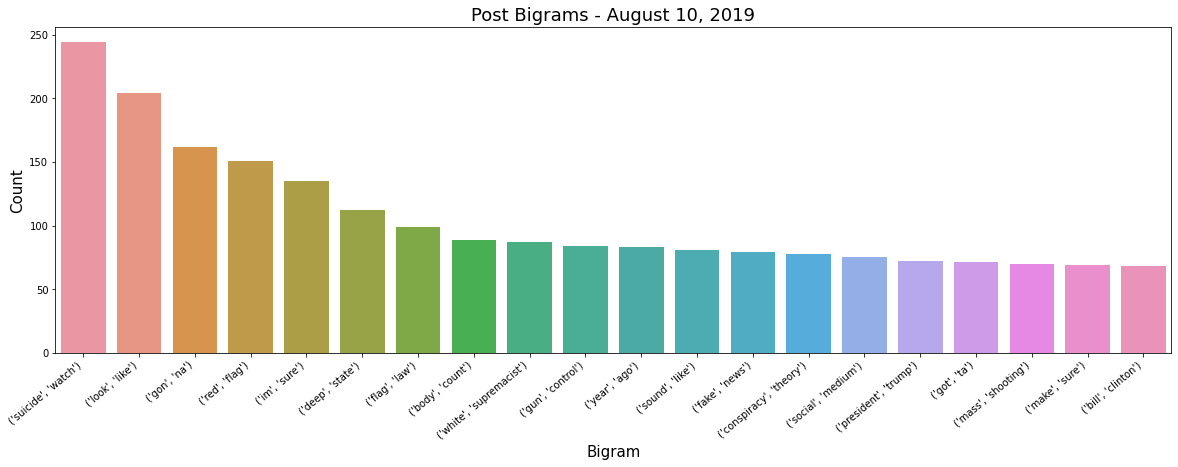

In [32]:
plt.figure(figsize=(20,6))
p = sns.barplot(x='bigram', y='Freq',
            data=vocab_df)
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
plt.ylabel("Count", size=15)
plt.xlabel("Bigram", size=15)
plt.title("Post Bigrams - August 10, 2019", size=18)
plt.show()

In [31]:
# vocab_data = [[k, v, vocab_counts[k]] for k, v in sorted_vocab_len.items()]
# vocab_data[0:10]

In [10]:
# import csv
# def write_list_to_csv(lines, file_name):
#     """
#     write list to csv
#     :param lines: list of data to write to csv
#     :param file_name: output file name
#     """
#     print(f"writine file to {file_name}")
#     with open(file_name, 'w') as writeFile:
#         writer = csv.writer(writeFile)
#         writer.writerows(lines)

In [11]:
# write_list_to_csv(vocab_data, "vocab_data_sample.csv")

In [33]:
vocab_size = len(vocab_counts)
print(f"vocab size {vocab_size}")

vocab size 180024


## train short text topic model

In [34]:
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
mgp = MovieGroupProcess(K=5, alpha=0.1, beta=0.8, n_iters=50)

In [35]:
fit1 = mgp.fit(sample_data , vocab_size)

In stage 0: transferred 15833 clusters with 5 clusters populated
In stage 1: transferred 13841 clusters with 5 clusters populated
In stage 2: transferred 13127 clusters with 5 clusters populated
In stage 3: transferred 12630 clusters with 5 clusters populated
In stage 4: transferred 12503 clusters with 5 clusters populated
In stage 5: transferred 12353 clusters with 5 clusters populated
In stage 6: transferred 12162 clusters with 5 clusters populated
In stage 7: transferred 12092 clusters with 5 clusters populated
In stage 8: transferred 12137 clusters with 5 clusters populated
In stage 9: transferred 12161 clusters with 5 clusters populated
In stage 10: transferred 12063 clusters with 5 clusters populated
In stage 11: transferred 11923 clusters with 5 clusters populated
In stage 12: transferred 11921 clusters with 5 clusters populated
In stage 13: transferred 12031 clusters with 5 clusters populated
In stage 14: transferred 11919 clusters with 5 clusters populated
In stage 15: transfe

### review gsdmm model output

In [36]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

Number of documents per topic : [6441 4629 3511 4282 1737]


In [38]:
# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-7:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [0 1 3 2 4]


In [59]:
def top_words(cluster_word_distribution, top_cluster, values):
    topic_word_df_dict = {}
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print(f"cluster {cluster}")
        sort_list = [[x[0], x[1]] for x in sort_dicts]
        sort_df = pd.DataFrame(sort_list, columns=["bigram", "count"])
        print(sort_df.head(20))
        print(' — — — — — — — — — ')
        topic_word_df_dict[cluster] = sort_df 
    return topic_word_df_dict

In [60]:
topwords_dict = top_words(mgp.cluster_word_distribution, top_index, 20)

cluster 0
                   bigram  count
0        (suicide, watch)    215
1               (gon, na)    127
2            (look, like)    126
3           (deep, state)     77
4              (im, sure)     69
5         (bill, clinton)     60
6    (conspiracy, theory)     58
7           (sound, like)     58
8   (witness, protection)     42
9              (he, dead)     42
10         (many, people)     38
11        (high, profile)     35
12      (commit, suicide)     35
13      (point, personal)     34
14  (personal, privilege)     34
15        (epstein, dead)     33
16     (president, trump)     30
17            (get, away)     30
18     (jeffrey, epstein)     30
19            (week, ago)     29
 — — — — — — — — — 
cluster 1
                  bigram  count
0            (red, flag)    112
1            (flag, law)     77
2         (gun, control)     74
3    (background, check)     49
4       (mass, shooting)     44
5              (got, ta)     43
6        (white, people)     35
7          

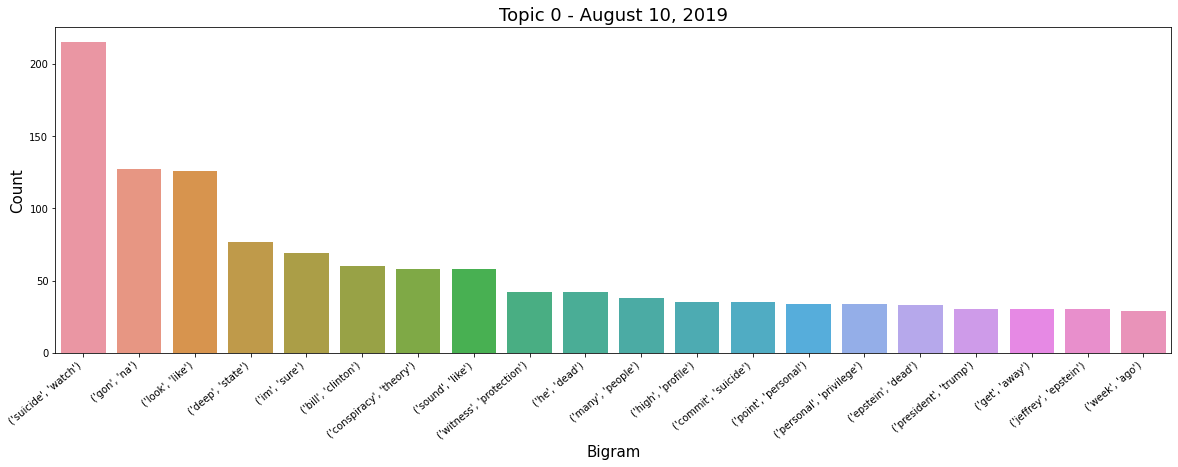

In [69]:
plt.figure(figsize=(20,6))
p = sns.barplot(x='bigram', y='count',
            data=topwords_dict[0])
p.set_xticklabels(p.get_xticklabels(), rotation=40, ha="right")
plt.ylabel("Count", size=15)
plt.xlabel("Bigram", size=15)
plt.title("Topic 0 - August 10, 2019", size=18)
plt.show()


In [82]:
topwords_dict[4].head(20)

,bigram,count
0,"(donald, trump)",52
1,"(red, flag)",29
2,"(new, york)",28
3,"(white, supremacist)",27
4,"(united, state)",25
5,"(suicide, watch)",24
6,"(even, though)",23
7,"(trump, president)",22
8,"(open, carry)",21
9,"(social, medium)",19


### review post text associated with gsdmm topics

In [83]:
# mgp.choose_best_label(list(sample_data)[1])
best_labels = sample_data.apply(lambda row: mgp.choose_best_label(row))
best_labels 

8368084    (2, 0.3318281081212431)
7622971    (2, 0.9436676898579266)
8319493    (2, 0.9999839470307287)
7872118    (4, 0.9999724652986237)
8439541    (3, 0.7699880063512873)
                    ...           
8098573                   (0, 0.0)
8468503                   (0, 1.0)
8341451    (2, 0.3318281081212431)
8024592    (3, 0.9999991051469794)
8012975    (2, 0.9999999990608772)
Name: bigrams, Length: 20600, dtype: object

In [84]:
sample_df = sample_data.to_frame()
best_labels = best_labels.to_frame()
sample_df = sample_df.merge(best_labels, left_index=True, right_index=True)
sample_df.head()

,bigrams_x,bigrams_y
8368084,"[(sparklin, tater)]","(2, 0.3318281081212431)"
7622971,"[(put, tshirt), (tshirt, lookit), (lookit, im)...","(2, 0.9436676898579266)"
8319493,"[(vegan, get), (get, fuck), (fuck, outta), (ou...","(2, 0.9999839470307287)"
7872118,"[(must, post), (post, every), (every, medium),...","(4, 0.9999724652986237)"
8439541,"[(gafftastically, funny), (funny, keep), (keep...","(3, 0.7699880063512873)"


In [85]:
sample_df['best_label'] = sample_df['bigrams_y'].apply(lambda row:row[0])
sample_df['best_label_prob'] = sample_df['bigrams_y'].apply(lambda row:row[1])
sample_df.head()

,bigrams_x,bigrams_y,best_label,best_label_prob
8368084,"[(sparklin, tater)]","(2, 0.3318281081212431)",2,0.331828
7622971,"[(put, tshirt), (tshirt, lookit), (lookit, im)...","(2, 0.9436676898579266)",2,0.943668
8319493,"[(vegan, get), (get, fuck), (fuck, outta), (ou...","(2, 0.9999839470307287)",2,0.999984
7872118,"[(must, post), (post, every), (every, medium),...","(4, 0.9999724652986237)",4,0.999972
8439541,"[(gafftastically, funny), (funny, keep), (keep...","(3, 0.7699880063512873)",3,0.769988


In [86]:
result = sample_df.merge(subset_date2, left_index=True, right_index = True)

In [87]:
result_restricted = result[['best_label', 'best_label_prob', 'text_clean_space', 'date']]
result_restricted.head()

,best_label,best_label_prob,text_clean_space,date
8368084,2,0.331828,SPARKLIN TATERS!!,2019-08-09
7622971,2,0.943668,*puts on Tshirt* [LOOKIT ME! IM A FREEDOM FIGH...,2019-08-11
8319493,2,0.999984,vegans get the fuck outta here with that soy s...,2019-08-11
7872118,4,0.999972,We must all post this on every media available...,2019-08-10
8439541,3,0.769988,So gafftastically funny. . Keep him in this race!,2019-08-11


In [88]:
topic_0 = result_restricted[result_restricted['best_label']==0]
topic_1 = result_restricted[result_restricted['best_label']==1]
topic_2 = result_restricted[result_restricted['best_label']==2]
topic_3 = result_restricted[result_restricted['best_label']==3]
topic_4 = result_restricted[result_restricted['best_label']==4]

In [95]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
topic_0[(topic_0['date']== datetime.strptime('2019-08-10', '%Y-%m-%d').date())].sort_values(
    'best_label_prob', ascending = False).head(20)

<ipython-input-95-1f8d0a59278a>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,best_label,best_label_prob,text_clean_space,date
7878298,0,1.0,"Time for Trump to put up or shut up. Wray needs to go, and the FBI should be taken over by our military and ultimately disbanded if needed. DOJ needs to be cleaned out from top to bottom, starting with Jessie Liu. Maybe time for Barr to go as well. We are living in a banana republic. We no longer have rule of law. It's despicable. No more slow roll out of changes or declass of docs. No more drip, drip, drip. We need a effin' wrecking ball. People need to be charged, handcuffed and perp walked. NOW.",2019-08-10
7837644,0,1.0,"Let's not get too married to him being ""suicided"". There's probably no way to prove it one way or the other. We're probably never going to know what really happened. What we can focus on is keeping the heat on to finish the investigation even though he's dead. Those girls still deserve justice and I don't doubt there's plenty to go around. Epstein got away, one way or another, but no one else should. Focus on that.",2019-08-10
8090114,0,1.0,"I work in a psychiatric prison and deal with this every hour, every day. There is NO WAY you commit suicide while on suicide watch. At our facility while youre actively on suicide watch there is a staff sitting at your door watching you. Another staff is walking the unit every 15 minutes checking on every inmate. We have alarms that if they start to do anything, we activate them and COs go in the cell. While on suicide watch, inmates are stripped and given a suicide smock, a rip proof smock. Everything is taken from their room, paper, clothes, personal items ect. There is NO WAY he did this alone.",2019-08-10
7712281,0,1.0,"I don't see trumpbodycount. Here is what I see is trending on Twitter as of 10:25 am PST: #Epstein Trending with: Jeffrey Epstein, #EpsteinSuicide, Suicide #Clinton Trending with: #ClintonBodyCount, #ClintonCrimeFamily #Clintons Trending with: The Clintons #Bill Clinton 89.9K Tweets #Jeffery Epstein 39.2K Tweets #Barr Trending with: Bill Barr, William Barr #Ghislaine Maxwell 41.3K Tweets #Suicide Watch 330K Tweets #EpsteinMurder 19.9K Tweets #epsteinDead 10.7K Tweets #Prince Andrew 64.4K Tweets",2019-08-10
8210258,0,1.0,"Bill Barr is slow rolling declassification... 80+days and nothing... this only empowers this type of obvious ""we're above the law"" behavior... spoiler alert, at best they would look into this and find Clinton's involved, but they would just never quite prove intent... then Hillary will be on tv and say something savvy like... at this point what difference does it make... or like what with a cloth or something... Barr, if you're a white hat, prove it, these institutions are not above reproach, let sunlight in and hold people accountable that should be on all sides.",2019-08-10
8069194,0,1.0,"*everyone* is skeptical and not buying it. The problem is, *everyone* on the left thinks it's fishy for all the wrong reasons. They actually think this somehow was done by Trump and Barr, and think Trump was boys w/ Epstein, and any evidence suggesting otherwise, or tying him to the Clintons, is somehow a russian bot conspiracy (despite the fact that scores of people have been onto Epstein and his connection to Clintons and others for about a decade+ now. It wasn't until just recently that you start seeing people trying so hard to tie Trump to him... I wonder why?)",2019-08-10
8059838,0,1.0,"&gt; I suggest you look up Occam's Razor, You do know that it **isn't** a ""law of nature"" like gravity or anything... it's an **observation** and a **generalization.** - I suggest you look up the word ""gullible""... because it definitely describes you. --- &gt;Epstein is dead Well, he's certainly been declared ""officially dead""... which relative to legal matters amounts to the same thing. (They can now ""bury"" the cases.) - But I rather **HIGHLY doubt** that he actually IS dead. --- &gt;They already raided his properties and busted open his safes. Maybe some of them... and so they **cl

In [94]:
topic_3[(topic_3['date']== datetime.strptime('2019-08-10', '%Y-%m-%d').date())].sort_values(
    'best_label_prob', ascending = False).head(20)

,best_label,best_label_prob,text_clean_space,date
8368340,3,1.0,"I'll bet even money that within the first six months the room-temperature-IQ drama queen is at Hah-vahd and realizes how truly *ignorant* he really is, he'll be the FIRST to complain of (insert this week's Victimhood Reason), the professors are: racist, homophobic, germophobic, ET-phone-homophobic, blah blah blah. Meanwhile, his **genuinely** BRILLIANT classmate Kyle Kashuv gets a *shiv between the shoulder-blades* (i.e., his acceptance to the same institution abruptly RESCINDED due to some *juvenile* comments he made on twitter - that 110% of his peers made FAR worse - years ago). No hypocrisy here. [Don't eat that!](http://magaimg.net/img/7dpc.jpg)",2019-08-10
8399698,3,1.0,"We had a presence of Marxist professors in the 60s/70s who trained and indoctrinated the current wave of neo-Marxist professors and educators, as well as journalists. This combined with the amalgamation of Intersectionalism and feminism by black feminists (namely Kimberl Crenshaw) in the mid-80s, which is the bedrock center of most Fake News' reporting and decision making today. (We're now seeing interectionalism infiltrate corporations, too. Whether it will stick remains to be seen.) Marxists/neo-Marxists have used education institutions as brainwashing and recruiting facilities for over 60 years, and we're dealing with the byproduct now. The Fake News, as we know now it, didn't exist before then.",2019-08-10
8371362,3,1.0,"Those who do not frequent 8ch and half-chan have no idea of how diverse the anons are and how many of them are in positions of importance. Most people see them as img boards full of 14 year old hackers, anti semites and the depraved of society. A lot of anons just get quite bored with the usual nonsensical background noise of the internet and life in general and need the playpen of others with quick wits, keen observation skills, critical thinking skills and unusual intelligence to escape the mundane. The fact that it scares off normies is exactly why they will always thrive - usually under the radar.",2019-08-10
8447572,3,1.0,"Yup. Side note.....The Vatican is The Roman Empire. It never died. It just adopted a semi form of Christianity (under Roman Emperor Constantine) to blend in and survive, and they blended it in with their Paganism. The result of this is what you see today......**Catholicism**. Knights Templar also never died out. They dropped their name and formed micro cults, like Freemasons, Knights of Columbus, Jesuits, Rotary Club, Lions Club, Elks Club, Kiwanis, Shriners, Scottish Rite, Order of Moose, etc.",2019-08-10
8358380,3,1.0,I used to think Alex was a UFO nut. and then I randomly stumbled upon his website like 7 years ago when I was doing research on the Occult his shit was so damn spot on... I didn't really have enough money to buy his supplements until the year 2017..... I bought his: * Survival Shield x-2 (iodine) * Super blue toothpaste is fucking AMAZING * the Krill oil is the best i've ever had. * and the Super male vitality ( That shit is actually very potenent/strong) Seriously be careful taking that. I was accidentally taking a quarter of a dropper full. I felt like Hercules. my muscles were just begging to be excersized.,2019-08-10
7643314,3,1.0,"Some on the left will try and blame Trump for everything, it is what they do, they have been doing that since forever, anything they can try to pin on Trump they will. Trouble is, it is not true and it only works on a small fraction of them and that fraction is getting smaller. Who was that leftists that posted on Twitter about Epstein ""some of our favorites will be shown to be pedos"". Clinton Body Count even trended on Twitter last time Epstein was attacked in prison. Sure they will be a weak push to pin this on Trump, it will fail.",2019-08-10
8251968,3,1.0,"But school especially public and college has no motivation, creativity, requires obedience without question, teachers dont explain what som

In [153]:
topic_1[(topic_1['date']== datetime.strptime('2019-08-10', '%Y-%m-%d').date())].sort_values('best_label_prob', ascending = False).head(20)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,best_label,best_label_prob,text_clean_space,date
7982902,1,1.0,"This is unusual for Brighton, it's an expensive place to live, doesn't have projects, combination of tourist and commuter town. So how could this happen? The long video shows them taking their bikes on the train to Brighton. Where from? At 20:45 the cameraman says 'Come to London'. For your convenience here are links to YT. The long video shows all their faces clearly. Not the best way to get away with a crime, but then they're not going to be very upset with a stern warning anyway. They look about 16 so should have a long criminal career ahead of them. Long version, 24 minutes - https://www.youtube.com/watch?v=6ZsJEjobRj4 One minute highlights - https://www.youtube.com/watch?v=7Mg-OKVtsC8 https://www.youtube.com/watch?v=wxgF8dITR-o",2019-08-10
7765560,1,1.0,"She stayed with him through cancer, he leaves her after she is diagnosed with breast cancer and 2.5 weeks before her lumpectomy. Dude is a real class act. I was bummed when he got busted because I am a testicular cancer survivor and Livestrong was really cool to me (sent me a bunch of free bracelets and a couple books) without me even asking for anything except info. But Lance ended up being such a shitty person that the 1 high-profile mens cancer charity tanked because of his fuckery. I didnt care about the PEDs, I did care that he is a straight-up douchebag when he thinks nobodys looking.",2019-08-10
8331749,1,1.0,"It is a spiritual warfare going on. These people believe in the devil and worship him. Spiritcooking, sex trafficking, every form of evil in order to have more and more demonic power. These people are fucking crazy. God intervened during the damn elections and got Trump in office I think. Put my conspiracy prophecy porn hat on. I don't care. The dude has been a last hope to wake the people up to the ultimate redpill. That we all need to follow Jesus. Return to Him and His ways. There is a spiritual problem in America. We need God fearing leaders again. The sheperds guarding the sheep are bad. Church over.",2019-08-10
8040043,1,1.0,"In Greece there was this ridiculous dude that run a newspaper. Cops were sent to arrest him... Amd the motherfucker had escape tunnels in his mansion. He wasn't even super rich or anything!! Then a year later or whatever... On his way somewhere.. His Porchse Cayenne crushed and he died in a blaze of fire... Near the airport! Again.. This was just an idiot, relatively rich yet not insanely rich douche that was proven to have escape tunnels in his mansion. If this Greek idiot had escape plans.. Then filthy rich Epstein definitely had one too.",2019-08-10
8368340,1,1.0,"I'll bet even money that within the first six months the room-temperature-IQ drama queen is at Hah-vahd and realizes how truly *ignorant* he really is, he'll be the FIRST to complain of (insert this week's Victimhood Reason), the professors are: racist, homophobic, germophobic, ET-phone-homophobic, blah blah blah. Meanwhile, his **genuinely** BRILLIANT classmate Kyle Kashuv gets a *shiv between the shoulder-blades* (i.e., his acceptance to the same institution abruptly RESCINDED due to some *juvenile* comments he made on twitter - that 110% of his peers made FAR worse - years ago). No hypocrisy here. [Don't eat that!](http://magaimg.net/img/7dpc.jpg)",2019-08-10
8371362,1,1.0,"Those who do not frequent 8ch and half-chan have no idea of how diverse the anons are and how many of them are in positions of importance. Most people see them as img boards full of 14 year old hackers, anti semites and the depraved of society. A lot of anons just get quite bored with the usual nonsensical background noise of the internet and life in general and need the playpen of others with quick wits, keen observation skills, critical thinking skills and unusual intelligence to escape the mundane. The fact that it scares off normies is exactly why they will always thrive - usually under the radar.",2019-08-10
8411539,1,1.0,"I've

In [154]:
topic_2[(topic_2['date']== datetime.strptime('2019-08-10', '%Y-%m-%d').date())].sort_values('best_label_prob', ascending = False).head(20)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,best_label,best_label_prob,text_clean_space,date
8399698,2,1.0,"We had a presence of Marxist professors in the 60s/70s who trained and indoctrinated the current wave of neo-Marxist professors and educators, as well as journalists. This combined with the amalgamation of Intersectionalism and feminism by black feminists (namely Kimberl Crenshaw) in the mid-80s, which is the bedrock center of most Fake News' reporting and decision making today. (We're now seeing interectionalism infiltrate corporations, too. Whether it will stick remains to be seen.) Marxists/neo-Marxists have used education institutions as brainwashing and recruiting facilities for over 60 years, and we're dealing with the byproduct now. The Fake News, as we know now it, didn't exist before then.",2019-08-10
8121480,2,1.0,"Every time someone with a family breaks the law and gets arrested, they are separated from their family. Why do people only fake outrage when this happens to illegal aliens? 1. Don't break the law and enter the US illegally. 1. If you continue to break the law, you run the risk of being arrested. 1. It's your duty and responsibility to have a plan for your children if that happens. If not, the state will step in and provide care for them. But it will take time, be needlessly stressful on your famiky, and you might not like where they end up. All of that is on you. Whether you are an illegal alien, a black, white, man, woman, or anything between. You go to jail, your kids aren't going with you.",2019-08-10
7666901,2,1.0,"I guarantee only a few of the protags would be decent people. The rest would be hill folk cliches spewing racism out every other word and the crowd would cheer when they died. And I wouldn't be surprised if the surviving heroes were secretly Democrats trying to hide their secret in the evil red states. Hollywood is stupid but they aren't going to make a movie about killing Republicans if they arent going to dehumanize at least some of them. If anything, the recent shootings are the real reason this got pulled. Not because it was obviously about killing conservatives for sport",2019-08-10
7713056,2,1.0,"People say that the Clinton body count means nothing simply because theyre famous and know a lot of people, therefor its natural to be linked to some of those peoples deaths. My counter is this.... I dont know of an Obama body count. If it was just some right wing smear, we would do it to Obama also right? Well we dont, because it doesnt exist even though the Obamas probably know just as many or more people than the clintons. This body count issue is exclusively a Clinton thing. No prominent democrat has a body count except the Clintons. Which takes away from the claims that this is just some right wing conspiracy.",2019-08-10
7984941,2,1.0,"From how high up in the DOJ and FBI did the **""ok""** come ? This is a case where the consequence for the ***""ugly-elite""*** is worse then revealing how powerful they really are. They did a FU, in your face murder so that they could continue sexually molesting children. God only knows how many, who have been smuggled across our Southern border are being kept in dog cages in basements or attics to be taken out and used when the ***""ugly-elite""*** has a sexual emergency - then God help the baby. &amp;#x200B; **We who fight to build a fence are fighting on the side of God !**",2019-08-10
7896268,2,1.0,"I argued with someone in WoW general chat today for 15 minutes. He was rapid firing anecdotes, lies, personal attacks, and even literally REEEEED at one point (actually spammed that) to drown out chat. I defeated every single point in a rapid fire motion, pushing them away and turning them on them on him as fast as they came. By the end I caught him in a lie, pinned it on him, and declared lying disgusting. He finally shut up. Did I cure his TDS? No. Hes a commie and hell always hate trump. Did I defeat TDS? Yes, and it felt great.",2019-08-10
8230004,2,1.0,"This whole trump body count thing

### LDA

In [96]:
import gensim
import gensim.corpora as corpora

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [97]:
id2word = corpora.Dictionary(subset_date2['tokens_lemma'])
print('Making corpus...')
corpus = [id2word.doc2bow(text) for text in subset_date2['tokens_lemma']]

lda = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word,
                                     num_topics =4, workers = 3,
                                     passes=10, iterations=100, random_state=0, eval_every=None)

Making corpus...


In [98]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [99]:
gensimvis.prepare(lda, corpus, id2word)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.001802  0.107866  1       1        30.408570
3     -0.049405  0.017082  2       1        29.447651
0     -0.090998 -0.078255  3       1        24.569921
1      0.138601 -0.046692  4       1        15.573858, topic_info=        Term        Freq       Total Category  logprob  loglift
180  guy      566.000000  566.000000  Default  30.0000  30.0000
44   epstein  759.000000  759.000000  Default  29.0000  29.0000
331  clinton  537.000000  537.000000  Default  28.0000  28.0000
357  suicide  560.000000  560.000000  Default  27.0000  27.0000
484  watch    399.000000  399.000000  Default  26.0000  26.0000
..     ...           ...         ...      ...      ...      ...
153  he       109.182574  679.974592  Topic4  -5.8645   0.0305 
114  many     93.859212   431.565237  Topic4  -6.0157   0.3340 
357  suicide  93.675184   560.522829  Topic4  -6.0176   0.0705 
149  time     101.490139  999.564122  Topic4  -5.9375  -0.4278 
158  also     89.057436   605.449973  Topic4  -6.0682  -0.0571 

[349 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
8263  2      0.975152  2008
1041  1      0.078115  2016
1041  2      0.812394  2016
1041  3      0.093738  2016
1831  1      0.084545  2020
...  ..           ...   ...
133   4      0.041907  year
1526  1      0.200647  yes 
1526  2      0.652102  yes 
1526  3      0.096465  yes 
1526  4      0.050162  yes 

[678 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])